<a href="https://colab.research.google.com/github/gerardopdm/ml-ejemplos/blob/master/Regresi%C3%B3n_lineal_m%C3%BAltiple.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
import seaborn as sns
%matplotlib inline 

In [0]:
!wget -O FuelConsumption.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv


--2019-07-24 02:48:57--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.193
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.193|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72629 (71K) [text/csv]
Saving to: ‘FuelConsumption.csv’

FuelConsumption.csv 100%[===================>]  70.93K  --.-KB/s    in 0.04s   

2019-07-24 02:48:57 (1.59 MB/s) - ‘FuelConsumption.csv’ saved [72629/72629]



#Cargar los datos

In [0]:
df = pd.read_csv("FuelConsumption.csv")

Se visualizan los datos para determinar cuantos se cargaron.....

In [0]:
df.tail()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
1062,2014,VOLVO,XC60 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1063,2014,VOLVO,XC60 AWD,SUV - SMALL,3.2,6,AS6,X,13.2,9.5,11.5,25,264
1064,2014,VOLVO,XC70 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1065,2014,VOLVO,XC70 AWD,SUV - SMALL,3.2,6,AS6,X,12.9,9.3,11.3,25,260
1066,2014,VOLVO,XC90 AWD,SUV - STANDARD,3.2,6,AS6,X,14.9,10.2,12.8,22,294


In [0]:
len(df.groupby("FUELTYPE").count())

4

In [0]:
df.isnull().sum()

MODELYEAR                   0
MAKE                        0
MODEL                       0
VEHICLECLASS                0
ENGINESIZE                  0
CYLINDERS                   0
TRANSMISSION                0
FUELTYPE                    0
FUELCONSUMPTION_CITY        0
FUELCONSUMPTION_HWY         0
FUELCONSUMPTION_COMB        0
FUELCONSUMPTION_COMB_MPG    0
CO2EMISSIONS                0
dtype: int64

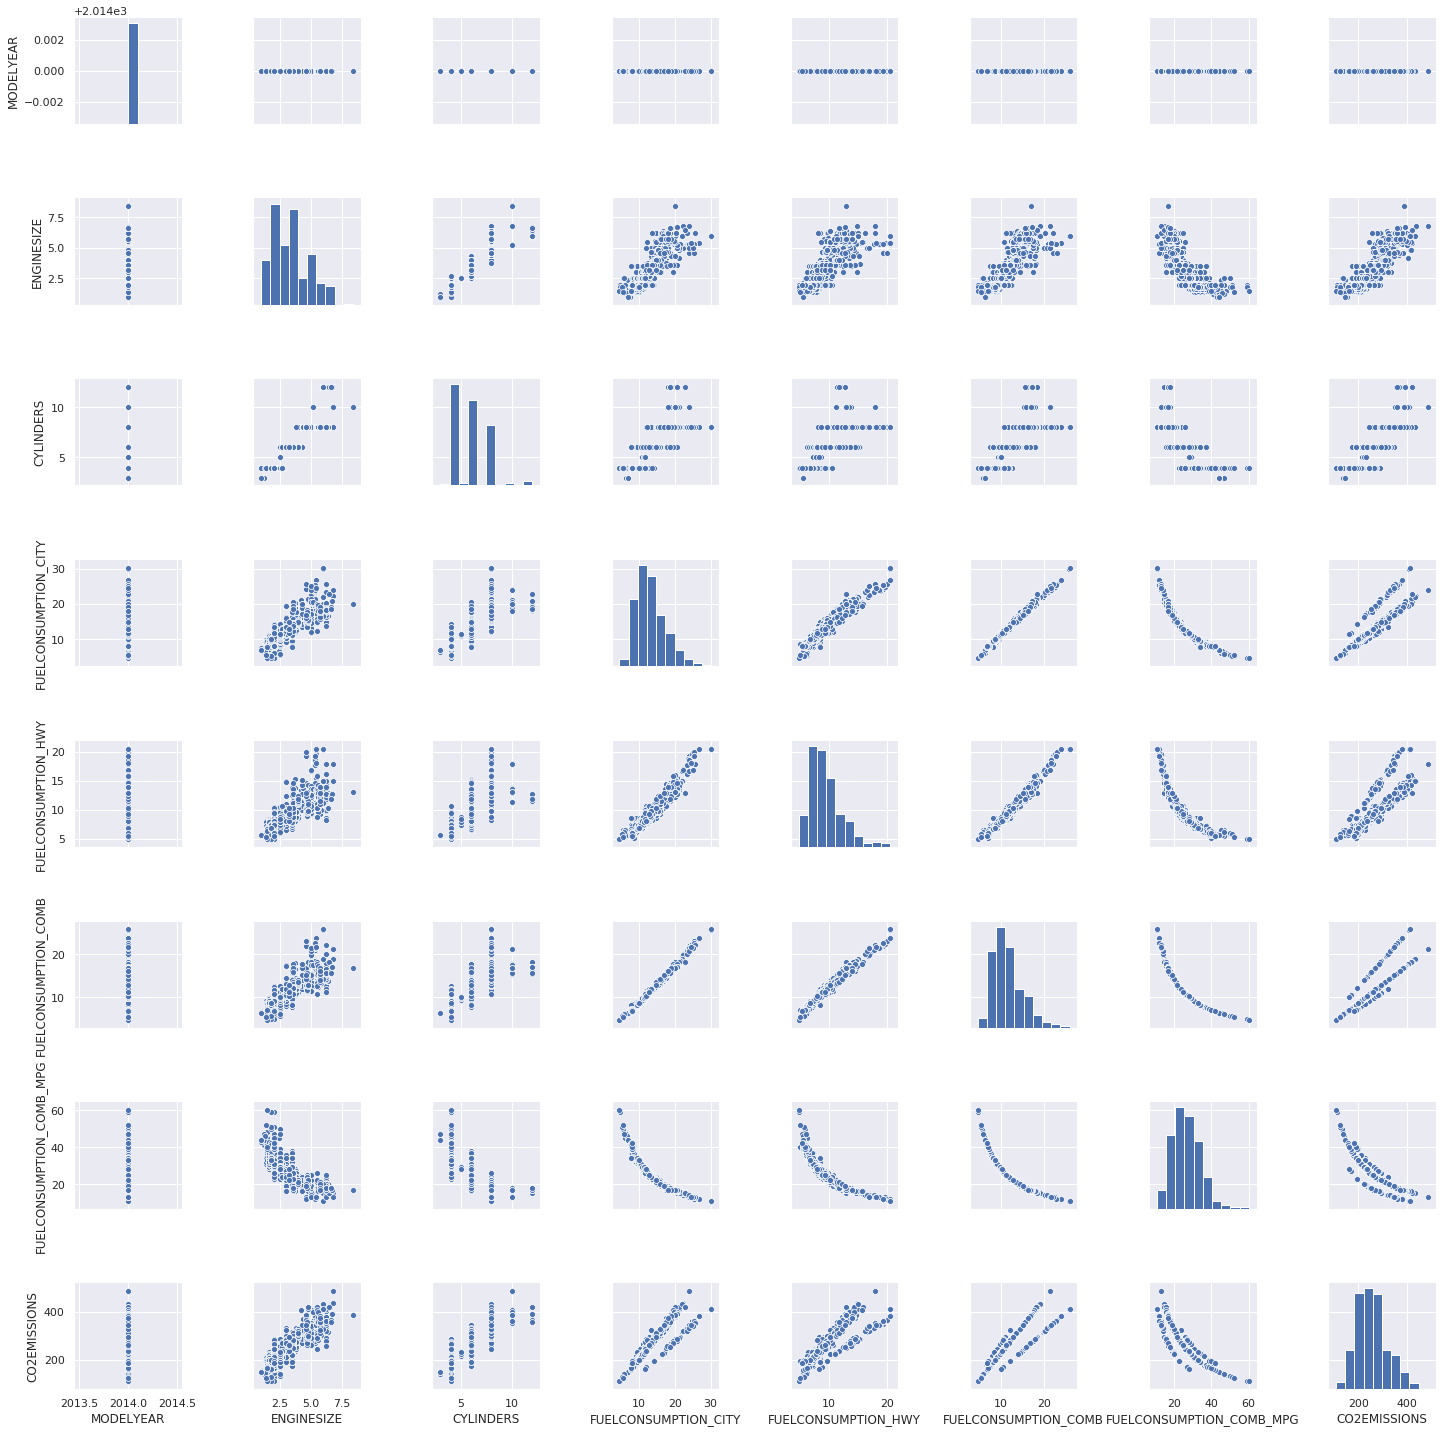

In [0]:
sns.set()
sns.pairplot(df)

### `FuelConsumption.csv`:
Los datos descargados del dataset de consumo de combustible, **`FuelConsumption.csv`**, contienen un modelo de taza de consumo y estimación de emisiones de bioxido de carbono para los nuevos vehículos de trabajo ligero para ventas en Canada. [Dataset source](http://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64)

- **MODELYEAR** e.g. 2014
- **MAKE** e.g. Acura
- **MODEL** e.g. ILX
- **VEHICLE CLASS** e.g. SUV
- **ENGINE SIZE** e.g. 4.7
- **CYLINDERS** e.g 6
- **TRANSMISSION** e.g. A6
- **FUEL CONSUMPTION in CITY(L/100 km)** e.g. 9.9
- **FUEL CONSUMPTION in HWY (L/100 km)** e.g. 8.9
- **FUEL CONSUMPTION COMB (L/100 km)** e.g. 9.2
- **CO2 EMISSIONS (g/km)** e.g. 182   --> low --> 0


In [0]:
df.corr()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
MODELYEAR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ENGINESIZE,NaN,1.000000,0.934011,0.832225,0.778746,0.819482,-0.808554,0.874154
CYLINDERS,NaN,0.934011,1.000000,0.796473,0.724594,0.776788,-0.770430,0.849685
FUELCONSUMPTION_CITY,NaN,0.832225,0.796473,1.000000,0.965718,0.995542,-0.935613,0.898039
FUELCONSUMPTION_HWY,NaN,0.778746,0.724594,0.965718,1.000000,0.985804,-0.893809,0.861748
FUELCONSUMPTION_COMB,NaN,0.819482,0.776788,0.995542,0.985804,1.000000,-0.927965,0.892129
FUELCONSUMPTION_COMB_MPG,NaN,-0.808554,-0.770430,-0.935613,-0.893809,-0.927965,1.000000,-0.906394
CO2EMISSIONS,NaN,0.874154,0.849685,0.898039,0.861748,0.892129,-0.906394,1.000000


In [0]:
df2 = df[["FUELCONSUMPTION_COMB_MPG","ENGINESIZE","CYLINDERS","CO2EMISSIONS"]]
df2.head()

,FUELCONSUMPTION_COMB_MPG,ENGINESIZE,CYLINDERS,CO2EMISSIONS
0,33,2.0,4,196
1,29,2.4,4,221
2,48,1.5,4,136
3,25,3.5,6,255
4,27,3.5,6,244


In [0]:
df["cilindros"]=df["CYLINDERS"].astype(str)
df.dtypes

MODELYEAR                     int64
MAKE                         object
MODEL                        object
VEHICLECLASS                 object
ENGINESIZE                  float64
CYLINDERS                     int64
TRANSMISSION                 object
FUELTYPE                     object
FUELCONSUMPTION_CITY        float64
FUELCONSUMPTION_HWY         float64
FUELCONSUMPTION_COMB        float64
FUELCONSUMPTION_COMB_MPG      int64
CO2EMISSIONS                  int64
cilindros                    object
dtype: object

In [0]:
#sns.scatterplot(x="FUELCONSUMPTION_COMB", y="CO2EMISSIONS", data=df, hue="FUELTYPE")

In [0]:
X=df2[["FUELCONSUMPTION_COMB_MPG","ENGINESIZE","CYLINDERS"]].values
y=df2["CO2EMISSIONS"].values
X

array([[33. ,  2. ,  4. ],
       [29. ,  2.4,  4. ],
       [48. ,  1.5,  4. ],
       ...,
       [24. ,  3. ,  6. ],
       [25. ,  3.2,  6. ],
       [22. ,  3.2,  6. ]])

##Normalizar datos

In [0]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()

In [0]:
X_norm = min_max_scaler.fit_transform(X)
#X_norm = X
X_norm 

array([[0.44897959, 0.13513514, 0.11111111],
       [0.36734694, 0.18918919, 0.11111111],
       [0.75510204, 0.06756757, 0.11111111],
       ...,
       [0.26530612, 0.27027027, 0.33333333],
       [0.28571429, 0.2972973 , 0.33333333],
       [0.2244898 , 0.2972973 , 0.33333333]])

In [0]:
from sklearn import linear_model
regr = linear_model.LinearRegression()

from sklearn.model_selection import train_test_split

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.8)
len(X_test)/(len(X_train)+len(X_test))

0.8003748828491096

In [0]:
regr.fit (X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

y = W0 + W1 * X


In [0]:
print ("Coeficiente:", regr.coef_)
print ("Intercepcion:", regr.intercept_)

Coeficiente: [-203.7636782   132.47224753   35.2778958 ]
Intercepcion: 267.33935114086233


In [0]:
from sklearn.metrics import r2_score

y_test_ = regr.predict(X_test)

print("Error medio absoluto (Mean absolute error): %.2f" % np.mean(np.absolute(y_test_ - y_test)))
print("Suma de cuadrados residual (Residual sum of squares) (MSE): %.2f" % np.mean((y_test_ - y_test) ** 2))
print("Coeficiente de determinación (R2-score): %.2f" % r2_score(y_test_ , y_test) )

Error medio absoluto (Mean absolute error): 15.36
Suma de cuadrados residual (Residual sum of squares) (MSE): 477.63
Coeficiente de determinación (R2-score): 0.87
